## Predição de evasão escolar

Este notebook tem como objetivo construir um modelo de machine learning que consiga informar se o aluno tem probabilidade de abandonar os estudos


<h4><u> Etapas de execução do notebook</u></h4>

1. [Preparação do ambiente](#1)<br>
1,1 [Importação das bibliotecas](#11)<br>
1,2 [Leitura dos dados](#12)<br>
1,3 [Identificação de valores faltantes](#13)<br><br>
2. [Análise descritiva e diagnóstica](#2)<br><br>
2,1 [Análise Descritiva](#21)<br>
2,2 [Análise Diagnóstica](#22)<br>
3. [Seleção de variáveis usando testes estatísticos](#3) <br>
3,1 [Seleção de variáveis quantitativas](#31)<br>
3,2 [Seleção de variáveis qualitativas](#32)<br><br>
4. [Lidando com classes desbalanceadas](#4)<br><br>

5. [Modelagem](#5) <br>
5,1 [Divisão de treino e teste](#51)<br>
5,2 [Definição de métricas](#52)<br>
5,4 [Cross-validation e seleção do modelo](#54)<br>
5,5 [Otimização de parâmetros](#55)<br>
5,6 [Treinando e testando o modelo final](#56)<br>
5,7 [Visualizando as árvores internas geradas](#57)<br><br>


<hr>

## 1. Preparação do ambiente <a id="1"></a>


<h4>1.1 Importação de bibliotecas:</h4><a id="11"></a>


In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pylab
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier,BaggingClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


<h4>1.2 Leitura de dados:</h4> <a id="12"></a>

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


<h4>1.3  Identificação de valores faltantes</h4> <a id="13"></a>

In [3]:
faltantes = pd.DataFrame({'colunas':df.columns, 
                      'tipo':df.dtypes,
                      'Qtde valores NaN':df.isna().sum(),
                      '% valores NaN':df.isna().sum()/df.shape[0],
                      'valores únicos por feature':df.nunique()})
faltantes = faltantes.reset_index()
faltantes

,index,colunas,tipo,Qtde valores NaN,% valores NaN,valores únicos por feature
0,Marital status,Marital status,int64,0,0.0,6
1,Application mode,Application mode,int64,0,0.0,18
2,Application order,Application order,int64,0,0.0,8
3,Course,Course,int64,0,0.0,17
4,Daytime/evening attendance,Daytime/evening attendance,int64,0,0.0,2
5,Previous qualification,Previous qualification,int64,0,0.0,17
6,Nacionality,Nacionality,int64,0,0.0,21
7,Mother's qualification,Mother's qualification,int64,0,0.0,29
8,Father's qualification,Father's qualification,int64,0,0.0,34
9,Mother's occupation,Mother's occupation,int64,0,0.0,32


Não tem nenhuma variável com valor faltante. Entretanto ao olhar o tipo dos dados, podemos ver que a variável Target é um "object" e deveria ser um valor inteiro, portante é importante tratarmos 

In [4]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


## 2. Análise descritiva e diagnóstica <a id="2"></a>

<h4> 2.1 Análise descritiva</h4><a id="21"></a>

/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

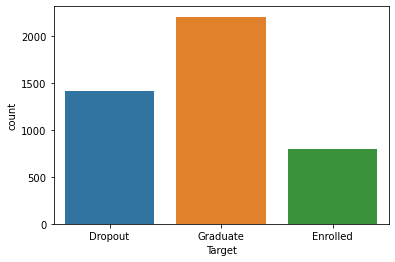

In [12]:
%matplotlib inline

sns.countplot(df['Target'])


O nosso objetivo é saber se a pessoa vai abandonar o curso ou vai se formar, então não iremos considerar as pessoas com status "enrolled".

Além disso, podemos identificar que temos mais amostras de pessoas que se graduaram, portanto teremos que fazer um balanceamento entre as classes.



/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

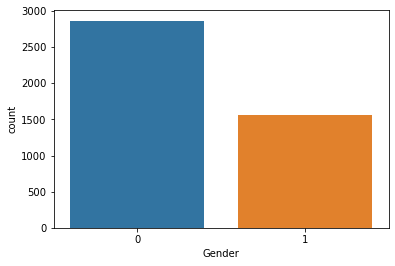

In [19]:
%matplotlib inline

sns.countplot(df['Gender'])


/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital status', ylabel='count'>

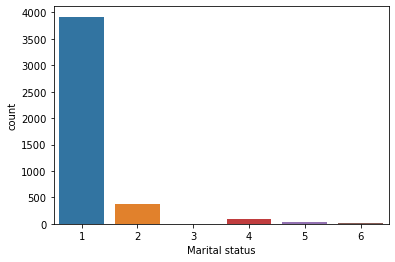

In [5]:
%matplotlib inline

sns.countplot(df['Marital status'])


/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Application mode', ylabel='count'>

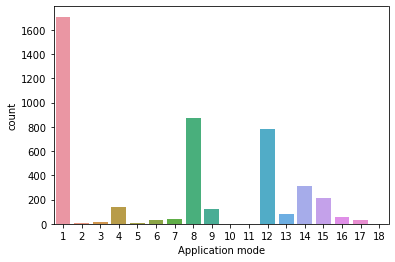

In [6]:
%matplotlib inline

sns.countplot(df['Application mode'])


/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Course', ylabel='count'>

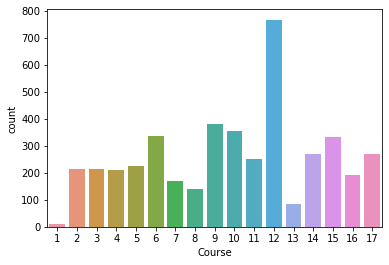

In [7]:
%matplotlib inline

sns.countplot(df['Course'])


/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Application order', ylabel='count'>

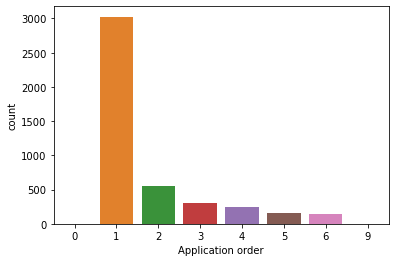

In [8]:
%matplotlib inline

sns.countplot(df['Application order'])


/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Nacionality', ylabel='count'>

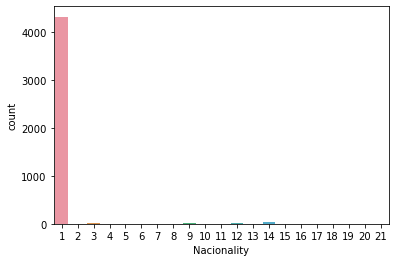

In [9]:
%matplotlib inline

sns.countplot(df['Nacionality'])


/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel="Mother's qualification", ylabel='count'>

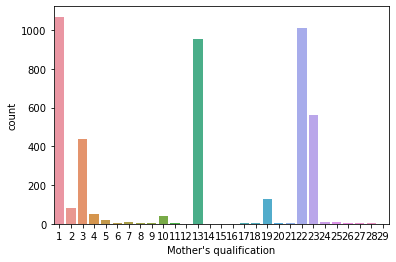

In [10]:
%matplotlib inline

sns.countplot(df["Mother's qualification"])


/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel="Father's qualification", ylabel='count'>

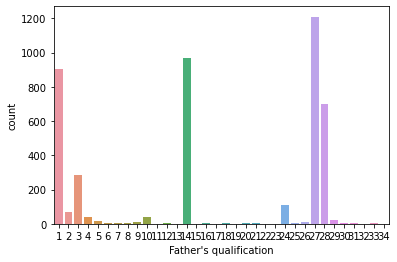

In [11]:
%matplotlib inline

sns.countplot(df["Father's qualification"])


<AxesSubplot:xlabel='Age at enrollment', ylabel='Count'>

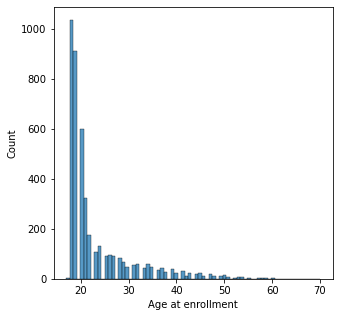

In [94]:
sns.histplot(df['Age at enrollment'])

<AxesSubplot:xlabel='Unemployment rate', ylabel='Count'>

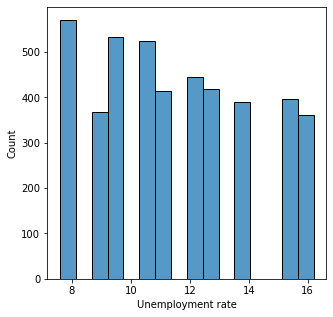

In [95]:
sns.histplot(df['Unemployment rate'])

<AxesSubplot:xlabel='GDP', ylabel='Count'>

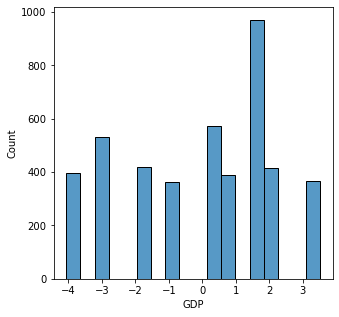

In [96]:
sns.histplot(df['GDP'])

<AxesSubplot:xlabel='Inflation rate', ylabel='Count'>

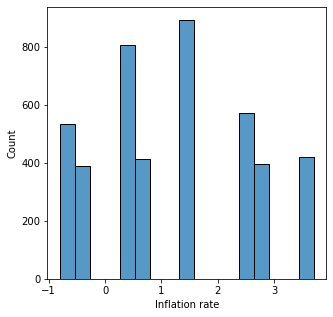

In [97]:
sns.histplot(df['Inflation rate'])

<AxesSubplot:xlabel='Curricular units 2nd sem (grade)', ylabel='Count'>

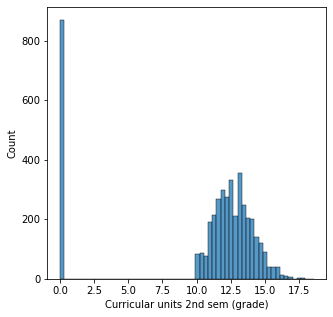

In [98]:
sns.histplot(df['Curricular units 2nd sem (grade)'])

In [13]:
df_filtrado = df[df.Target !='Enrolled']
df_filtrado

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


Vamos comparar o tamanho da base depois desse filtro:

In [14]:
df_filtrado.shape

(3630, 35)

In [15]:
df.shape

(4424, 35)

<Figure size 432x1440 with 0 Axes>

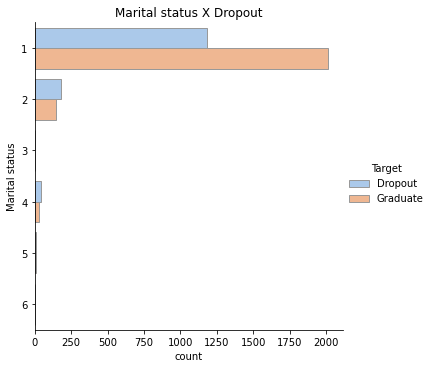

In [16]:
%matplotlib inline
plt.figure(figsize = (6,20))
sns.catplot(y="Marital status", hue="Target", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_filtrado)
plt.title('Marital status X Dropout')

plt.show()

In [17]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

<Figure size 432x1440 with 0 Axes>

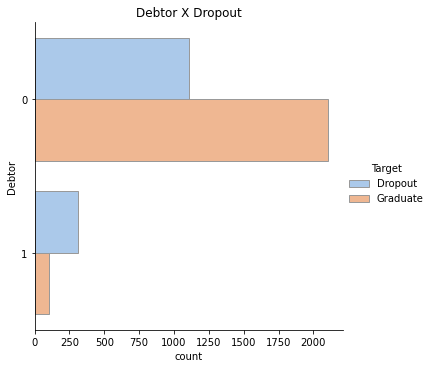

In [100]:
%matplotlib inline
plt.figure(figsize = (6,20))
sns.catplot(y="Debtor", hue="Target", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_filtrado)
plt.title('Debtor X Dropout')

plt.show()

<Figure size 432x1440 with 0 Axes>

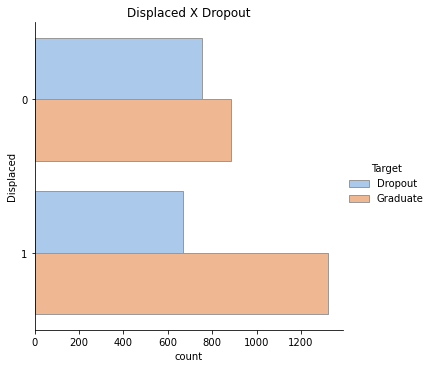

In [101]:
%matplotlib inline
plt.figure(figsize = (6,20))
sns.catplot(y="Displaced", hue="Target", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_filtrado)
plt.title('Displaced X Dropout')

plt.show()

<Figure size 432x1440 with 0 Axes>

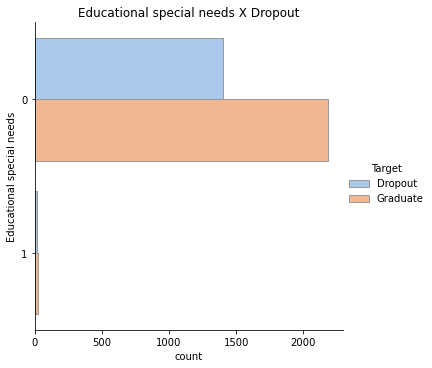

In [102]:
%matplotlib inline
plt.figure(figsize = (6,20))
sns.catplot(y="Educational special needs", hue="Target", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_filtrado)
plt.title('Educational special needs X Dropout')

plt.show()

<Figure size 432x1440 with 0 Axes>

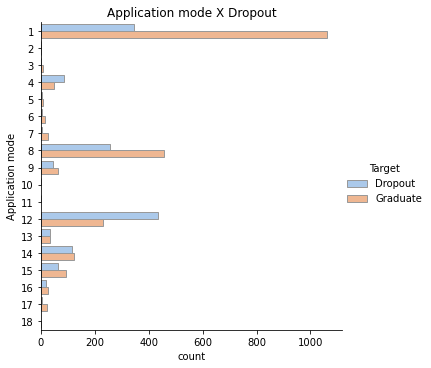

In [103]:
%matplotlib inline
plt.figure(figsize = (6,20))
sns.catplot(y="Application mode", hue="Target", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_filtrado)
plt.title('Application mode X Dropout')

plt.show()

<Figure size 432x1440 with 0 Axes>

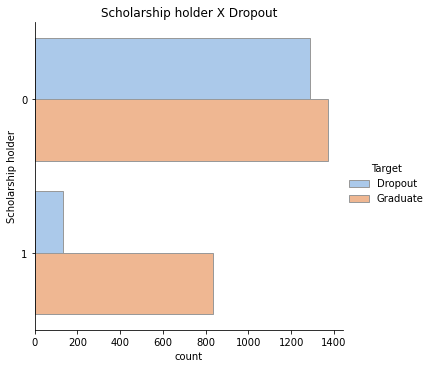

In [104]:
%matplotlib inline
plt.figure(figsize = (6,20))
sns.catplot(y="Scholarship holder", hue="Target", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_filtrado)
plt.title('Scholarship holder X Dropout')

plt.show()

<Figure size 432x1440 with 0 Axes>

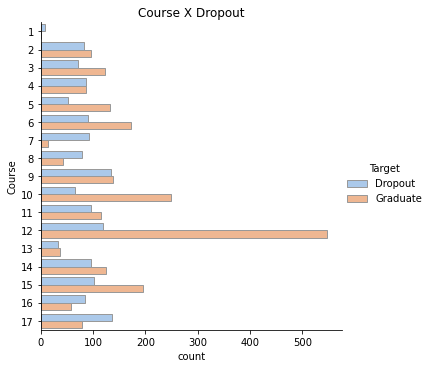

In [105]:
%matplotlib inline
plt.figure(figsize = (6,20))
sns.catplot(y="Course", hue="Target", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_filtrado)
plt.title('Course X Dropout')

plt.show()

<Figure size 432x1440 with 0 Axes>

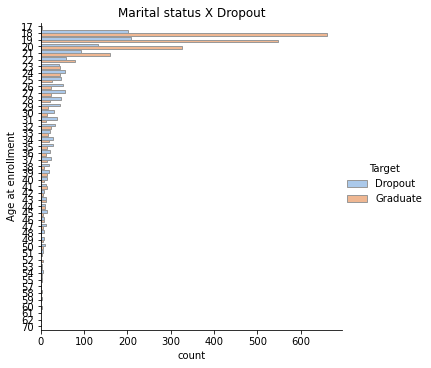

In [18]:
%matplotlib inline
plt.figure(figsize = (6,20))
sns.catplot(y="Age at enrollment", hue="Target", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_filtrado)
plt.title('Marital status X Dropout')

plt.show()

<AxesSubplot:xlabel='Target', ylabel='Curricular units 1st sem (grade)'>

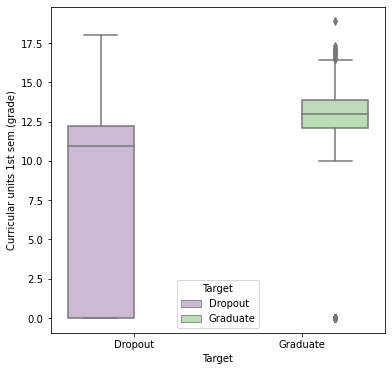

In [22]:
plt.figure(figsize = (6,6))

sns.boxplot(x="Target", y="Curricular units 1st sem (grade)", hue="Target",data=df_filtrado, palette="PRGn",showfliers=True)
#plt.title('Boxplot da quantidade de plaquetas no sangue X Sobreviventes')

<AxesSubplot:xlabel='Target', ylabel='Curricular units 2nd sem (grade)'>

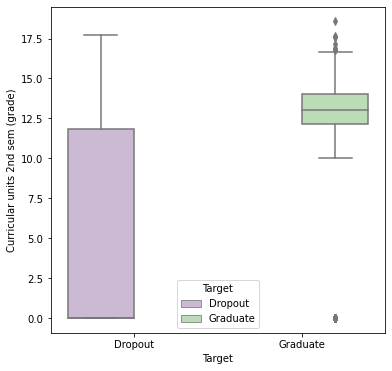

In [20]:
plt.figure(figsize = (6,6))

sns.boxplot(x="Target", y="Curricular units 2nd sem (grade)", hue="Target",data=df_filtrado, palette="PRGn",showfliers=True)
#plt.title('Boxplot da quantidade de plaquetas no sangue X Sobreviventes')

<AxesSubplot:xlabel='Target', ylabel='Unemployment rate'>

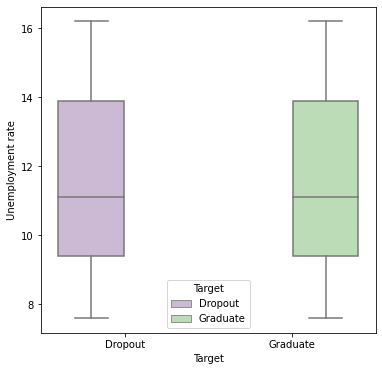

In [106]:
plt.figure(figsize = (6,6))

sns.boxplot(x="Target", y="Unemployment rate", hue="Target",data=df_filtrado, palette="PRGn",showfliers=True)
#plt.title('Boxplot da quantidade de plaquetas no sangue X Sobreviventes')

<AxesSubplot:xlabel='Target', ylabel='Inflation rate'>

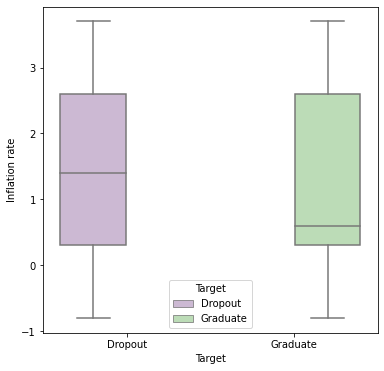

In [107]:
plt.figure(figsize = (6,6))

sns.boxplot(x="Target", y="Inflation rate", hue="Target",data=df_filtrado, palette="PRGn",showfliers=True)
#plt.title('Boxplot da quantidade de plaquetas no sangue X Sobreviventes')

Vamos transformar a variável target em número antes de selecionarmos as features

In [23]:
encoded = pd.get_dummies(df_filtrado.Target)
encoded
#


,Dropout,Graduate
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
4419,0,1
4420,1,0
4421,1,0
4422,0,1


In [26]:
df_final = pd.concat([df_filtrado, encoded['Dropout']], axis='columns')

In [40]:
df_final = df_final.drop(['Target'], axis='columns')


## 3. Seleção de variáveis usando testes estatísticos<a id="3"></a>


<h4> 3.1 Seleção de variáveis quantitativas </h4><a id="31"></a>

In [44]:
df_final.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

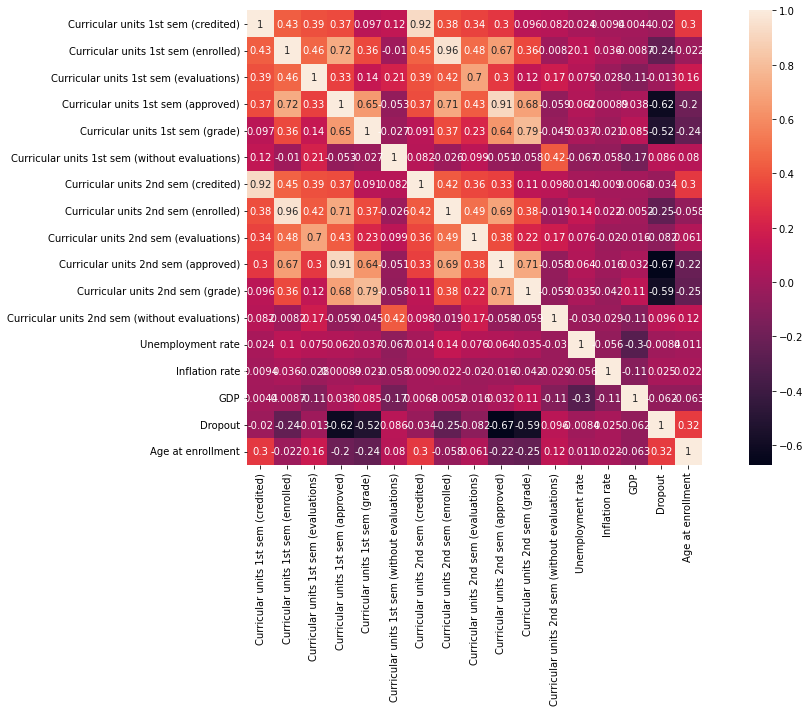

In [50]:
plt.rc('figure', figsize = (15,10))

to_corr = df_final[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)','Unemployment rate', 'Inflation rate', 'GDP', 'Dropout','Age at enrollment',
                   ]]
corr = to_corr.corr('spearman')
fig = sns.heatmap(corr, annot=True, square=True)
_ = plt.tight_layout()

Podemos considerar a correlação de Spearman como um método para seleção de variáveis, que é melhor para verificar a correlação e o impacto entre variáveis categóricas (que no caso é o nosso target) vs contínua. E com isso podemos ver que as variáveis 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)'tem grande correlação com o target




<h4> 3.2 Seleção de variáveis qualitativas </h4><a id="32"></a>

### Chi-square

Para calcular a correlação entre as variáveis categóricas e o target, utilizei o Chi-Square. Esse teste estatístico é um dos mais conhecidos quando queremos verificar se 2 variáveis categórias são correlacionadas. Nele a hipótese nula é que as variáveis são independentes e se o valor p retornado for menor ou igual ao valor alfa definido, então rejeitamos essa hipotése e podemos assumir que as variáveis na verdade são dependentes uma das outras.

In [42]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance                      3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Nacionality                                     3630 non-null   int64  
 7   Mother's qualification                          3630 non-null   int64  
 8   Father's qualification                          3630 non-null   int64  
 9   Mother's occupation                      

In [51]:
dummies = df_final[['Marital status','Application mode','Application order','Course','Daytime/evening attendance','Previous qualification',
                   'Nacionality',"Mother's qualification","Father's qualification","Mother's occupation","Father's occupation",'Displaced','Educational special needs','Debtor',
                    'Tuition fees up to date','Gender','Scholarship holder','International'
                   
                   ]]


In [52]:
# interação para calcular para cada variável o Chi2
for var in dummies:
    nl = "\n"
    
    crosstab = pd.crosstab(dummies[f"{var}"], df_final['Dropout'])
    print(crosstab, nl)
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f"Valor Chi2= {chi2}{nl}p-value= {p}{nl}Grau de liberdade= {dof}{nl}")
    alpha = 0.05
    if p <= alpha:
        print('Dependente (rejeitar H0)')
    else:
        print('Independente (falha ao rejeitar H0)')

Dropout            0     1
Marital status            
1               2015  1184
2                148   179
3                  1     1
4                 33    42
5                 11    11
6                  1     4 

Valor Chi2= 53.13140309159916
p-value= 3.160760691704852e-10
Grau de liberdade= 5

Dependente (rejeitar H0)
Dropout              0    1
Application mode           
1                 1063  345
2                    1    2
3                    6    2
4                   47   85
5                    7    3
6                   15    5
7                   25    5
8                  457  256
9                   63   45
10                   0    1
11                   0    1
12                 229  435
13                  32   34
14                 122  115
15                  94   63
16                  26   20
17                  21    4
18                   1    0 

Valor Chi2= 392.06591785320796
p-value= 8.435153363624903e-73
Grau de liberdade= 17

Dependente (rejeitar H0)
Dr

Com as variáveis apresentadas a que teve dependência com a evasão do aluno é: Marital status,Application mode, Application order, Course, Daytime/evening attendance, Previous qualification, Mother's qualification,
Father's qualification, Mother's occupation,Father's occupation, Displaced, Debtor, Tuition fees up to date, Gender, Scholarship holder





Não iremos utilizar a variável Gender como entrada para o modelo, para evitar criar um modelo com viés de gênero (um modelo que dê um peso maior para a evsão escolar da pessoa com base no gênero dela)


## 4. Lidando com classes desbalanceadas <a id="4"></a>


Como a variável target Dropout está desbalanceando é necessário fazer um tratamento nos dados para que os valores das métricas do modelo não sejam incorretas. Neste caso estou utilizando o oversampling, que é uma forma de "criar" mais dados na variável que tiver uma quantidade menor, que no nosso caso são o valor 1, ou seja, temos menos pessoas que abandoram a escola, então iremos duplicar os dados que tiverem valor Dropout = 1.





/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dropout', ylabel='count'>

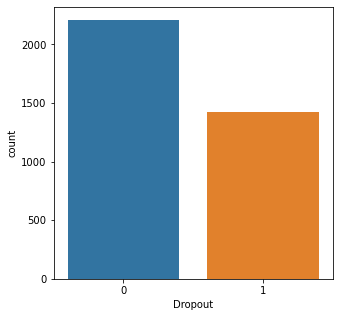

In [55]:
plt.rc('figure', figsize = (5,5))

sns.countplot(df_final.Dropout)

Com esse gráfico conseguimos ver que há uma diferença enorme na quantidade de cada valor da Target

In [64]:
columns_select = ['Marital status','Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', "Mother's qualification",
"Father's qualification", "Mother's occupation","Father's occupation", 'Displaced', 'Debtor', 'Tuition fees up to date', 'Scholarship holder','Curricular units 2nd sem (grade)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)']
                  
                  

/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


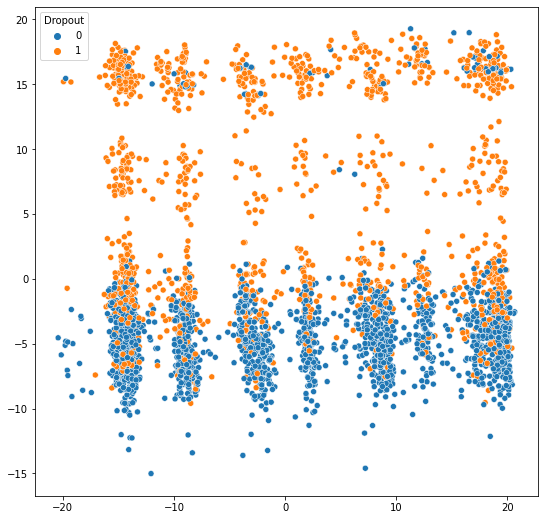

In [65]:
plt.figure(figsize = (9,9))

pca = PCA(n_components=2)

pca.fit(df_final[columns_select])

imbalanced_pca = pca.transform(df_final[columns_select])
sns.scatterplot(imbalanced_pca[:, 0], imbalanced_pca[:, 1], hue=df_final['Dropout']);


In [66]:
smote = SMOTE(sampling_strategy="minority")
X = np.array(df_final[columns_select])

X_smote, y_smote = smote.fit_resample(X, df_final['Dropout'])


In [67]:
data_smote = pd.DataFrame(data=X_smote,columns=df_final[columns_select].columns)

/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


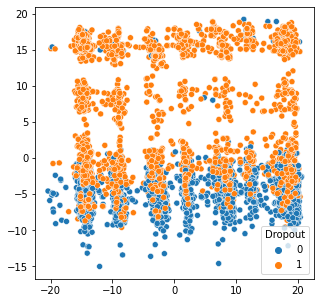

In [68]:
plt.figure(figsize = (5,5))

imbalanced_pca_smote = pca.transform(X_smote)
sns.scatterplot(x=imbalanced_pca_smote[:, 0], y=imbalanced_pca_smote[:, 1], hue=y_smote);


/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dropout', ylabel='count'>

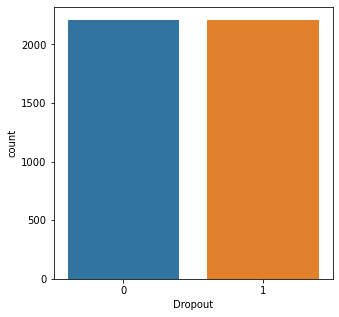

In [69]:
plt.figure(figsize = (5,5))

sns.countplot(y_smote)

Agora conseguimos visualizar que a classe está balanceada.

## 5. Modelagem <a id="5"></a>



<h4> 5.1 Divisão de treino e teste</h4><a id="51"></a>

In [70]:
X = data_smote.copy()

In [71]:
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Debtor,Tuition fees up to date,Scholarship holder,Curricular units 2nd sem (grade),Curricular units 1st sem (grade),Curricular units 1st sem (approved),Curricular units 2nd sem (approved)
0,1.0,8.0,5.0,2.0,1.0,1.0,13.0,10.0,6.0,10.0,1.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0
1,1.0,6.0,1.0,11.0,1.0,1.0,1.0,3.0,4.0,4.0,1.0,0.0,0.0,0.0,13.666667,14.000000,6.0,6.0
2,1.0,1.0,5.0,5.0,1.0,1.0,22.0,27.0,10.0,10.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,1.0,8.0,2.0,15.0,1.0,1.0,23.0,27.0,6.0,4.0,1.0,0.0,1.0,0.0,12.400000,13.428571,6.0,5.0
4,2.0,12.0,1.0,3.0,0.0,1.0,22.0,28.0,10.0,10.0,0.0,0.0,1.0,0.0,13.000000,12.333333,5.0,6.0


In [72]:
X.shape

(4418, 18)

In [74]:
X = X.astype({'Marital status':'int',
         'Application mode':'int','Application order':'int','Course':'int','Daytime/evening attendance':'int','Previous qualification':'int',
             "Mother's qualification":'int',"Father's qualification":'int',"Mother's occupation":'int',"Father's occupation":'int',
             'Displaced':'int','Debtor':'int','Tuition fees up to date':'int','Scholarship holder':'int'})




In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y_smote, test_size=0.3, random_state=2811)

print ('Set de Treino:', X_train.shape,  y_train.shape)
print ('Set de Teste:', X_test.shape,  y_test.shape)

Set de Treino: (3092, 18) (3092,)
Set de Teste: (1326, 18) (1326,)


In [76]:
X_train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Debtor,Tuition fees up to date,Scholarship holder,Curricular units 2nd sem (grade),Curricular units 1st sem (grade),Curricular units 1st sem (approved),Curricular units 2nd sem (approved)
502,1,1,1,5,1,1,1,1,2,2,1,0,1,0,11.166667,12.833333,6.000000,6.000000
1752,1,1,1,9,1,1,1,28,6,6,0,1,1,0,12.400000,10.875000,5.000000,4.000000
2798,1,8,3,12,1,1,1,14,8,9,1,0,1,1,12.943750,13.271667,6.000000,7.000000
3896,1,1,3,12,1,1,2,28,3,4,1,0,1,0,13.213951,12.623962,7.000000,7.831236
4100,1,8,2,15,1,1,23,14,5,5,0,0,0,0,12.116684,12.195904,5.746284,4.746284


<h4> 5.2 Definição de métricas </h4><a id="52"></a>

**Métricas que vou dar um peso maior na hora de selecionar o melhor modelo:**
1. Recall: O cenário mais crítico, é quando o modelo fala que a pessoa não tem probabilidade de abandonar mas na verdade ela tem uma probabilidade alta de abandonar (Falso Negativo). 
2. AUC (Área embaixo da curva): Mostra o quão bem o modelo consegue diferenciar as classes 0 e 1.
3. F1_Score: Apesar de eu dar um peso maior para o recall, estou considerando também os Falsos Positivos, pois o modelo também precisa saber diferenciar bem as classes.


In [77]:
# Método para plotar a matriz de confusão
def matriz_confusao(real, predito):
    plt.figure(figsize = (9,9))
    matriz = metrics.confusion_matrix(real,predito)
    fig, ax = plt.subplots()
    classes = y_smote.unique()
    im = ax.imshow(matriz,cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(matriz.shape[1]),
           yticks=np.arange(matriz.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title='Matriz de confusão',
           ylabel='True label',
           xlabel='Predicted label')
    thresh = matriz.max().mean()
    for i in range(matriz.shape[0]):
        for j in range(matriz.shape[1]):
            ax.text(j, i, format(matriz[i, j]),
                ha="center", va="center",
                color="white" if matriz[i, j] > thresh else "black")
    fig.tight_layout()

In [78]:
# Método para gerar o report das métricas do classificador
def metrica_geral(teste, predict):
    metrica = metrics.classification_report(teste,predict)
    print(metrica)

<h4> 5.4 Cross-validation e seleção do modelo</h4><a id="54"></a>

Usarei o cross validation para avaliar a capacidade de generalização dos modelos, em outras palavras, verificar o quão pronto o modelo está para receber novos dados, para isso estou levando em consideração a média do valor da curva ROC, valor do Recall, e o valor do desvio padrão de cada uma dessas métricas, estou considerando o desvio padrão pois a média é sensível a outliers então calcular o desvio padrão pode ajudar a saber como está distribuído os resultados em relação a média. 

O modelo que tiver os scores altos para Recall, Curva ROC, F1 Score e desvio padrão baixo para todas essas médias (ou seja o valor dos scores estão bem próximos da média), será testado novamente usandos os dados de teste e treino para analisarmos os valores de FN (Falsos Negativos), para que eu possa avaliar o impacto do modelo no problema.


In [86]:
for model in [RandomForestClassifier,ExtraTreesClassifier,DecisionTreeClassifier,BaggingClassifier,svm.SVC,GaussianNB]:
    cls = model()
    s= cross_validate(cls, X_train, y_train, return_train_score=False,
               scoring=['recall', 'roc_auc','f1'])
    print('{} AUC: {} STD: {} Recall: {} STD: {} F1: {} STD: {}'.format(model.__name__,s['test_roc_auc'].mean(), s['test_roc_auc'].std(),s['test_recall'].mean(),s['test_recall'].std()
                                                                              ,s['test_f1'].mean(), s['test_f1'].std()))
    
    
    
    

RandomForestClassifier AUC: 0.9586602847766278 STD: 0.0055781650313286866 Recall: 0.8707734303912649 STD: 0.01029622095292428 F1: 0.8970299296302535 STD: 0.005528038539746328
ExtraTreesClassifier AUC: 0.9572947899032151 STD: 0.007120335649644355 Recall: 0.8669578404610252 STD: 0.01490402282910525 F1: 0.8986648882788544 STD: 0.00711403254479888
DecisionTreeClassifier AUC: 0.8526316385923215 STD: 0.012673220786629717 Recall: 0.866331007987059 STD: 0.01595264089780218 F1: 0.8568266734415803 STD: 0.011546461930763807
BaggingClassifier AUC: 0.9431034023662057 STD: 0.006118121125558379 Recall: 0.8364068344960065 STD: 0.017769707563917016 F1: 0.879467302820214 STD: 0.010877684090349192
SVC AUC: 0.9182897221866752 STD: 0.006781019888599598 Recall: 0.8033060357901123 STD: 0.020117445904974954 F1: 0.8517697244163248 STD: 0.015714345232406175
GaussianNB AUC: 0.9077104062953143 STD: 0.012342466900894043 Recall: 0.7402749974724496 STD: 0.01917340265564636 F1: 0.8132190703864548 STD: 0.0137586970321

RandomForest foi o que apresentou melhores métricas para auc, recall e F1 com baixo desvio padrão

<h4> 5.5 Otimização de parâmetros</h4><a id="55"></a>

Agora irei ajustar os parâmetros do modelo RandomForest, com o método GridSearch que constroe um modelo para cada combinação possível de todos os valores de hiperparâmetro fornecidos, avaliando cada modelo e selecionando os parametros que tiverem melhor valor para o score selecionado, que no caso eu considerei o Recall.



In [89]:
# # #Gridsearch
reg_et = RandomForestClassifier()
parameters = {
              'max_depth': [10,20,25,30,35],
              'min_samples_split': [4,6,10],
              'n_estimators': [100, 200, 500]}

et_grid = GridSearchCV(reg_et,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)

et_grid.fit(X_train,y_train)

print(et_grid.best_score_)
print(et_grid.best_params_)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
0.8965076166351205
{'max_depth': 25, 'min_samples_split': 4, 'n_estimators': 100}


<h4> 5.6 Treinando e testando o modelo final</h4><a id="56"></a>


Depois de ter o retorno das melhores configurações agora irei criar o modelo treinar e tirar as métricas.

In [90]:
model_clf = RandomForestClassifier(max_depth= 25, min_samples_split=4, n_estimators= 100, random_state=2900)

model_clf.fit(X_train, y_train)
model_predict_clf = model_clf.predict_proba(X_test) # predição com valor binário de saída
model_predict_clf_no_proba = model_clf.predict(X_test) # predição com a probabilidade

In [91]:
metrica_geral(y_test, model_predict_clf_no_proba)

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       688
           1       0.93      0.89      0.91       638

    accuracy                           0.91      1326
   macro avg       0.91      0.91      0.91      1326
weighted avg       0.91      0.91      0.91      1326



In [92]:
roc_auc_score(y_test,model_predict_clf_no_proba)

0.9132212765181892

<Figure size 648x648 with 0 Axes>

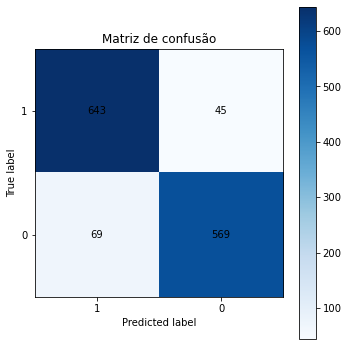

In [93]:
matriz_confusao(y_test,model_predict_clf_no_proba)

<h4> 5.7 Visualizando as árvores internas geradas</h4><a id="57"></a>

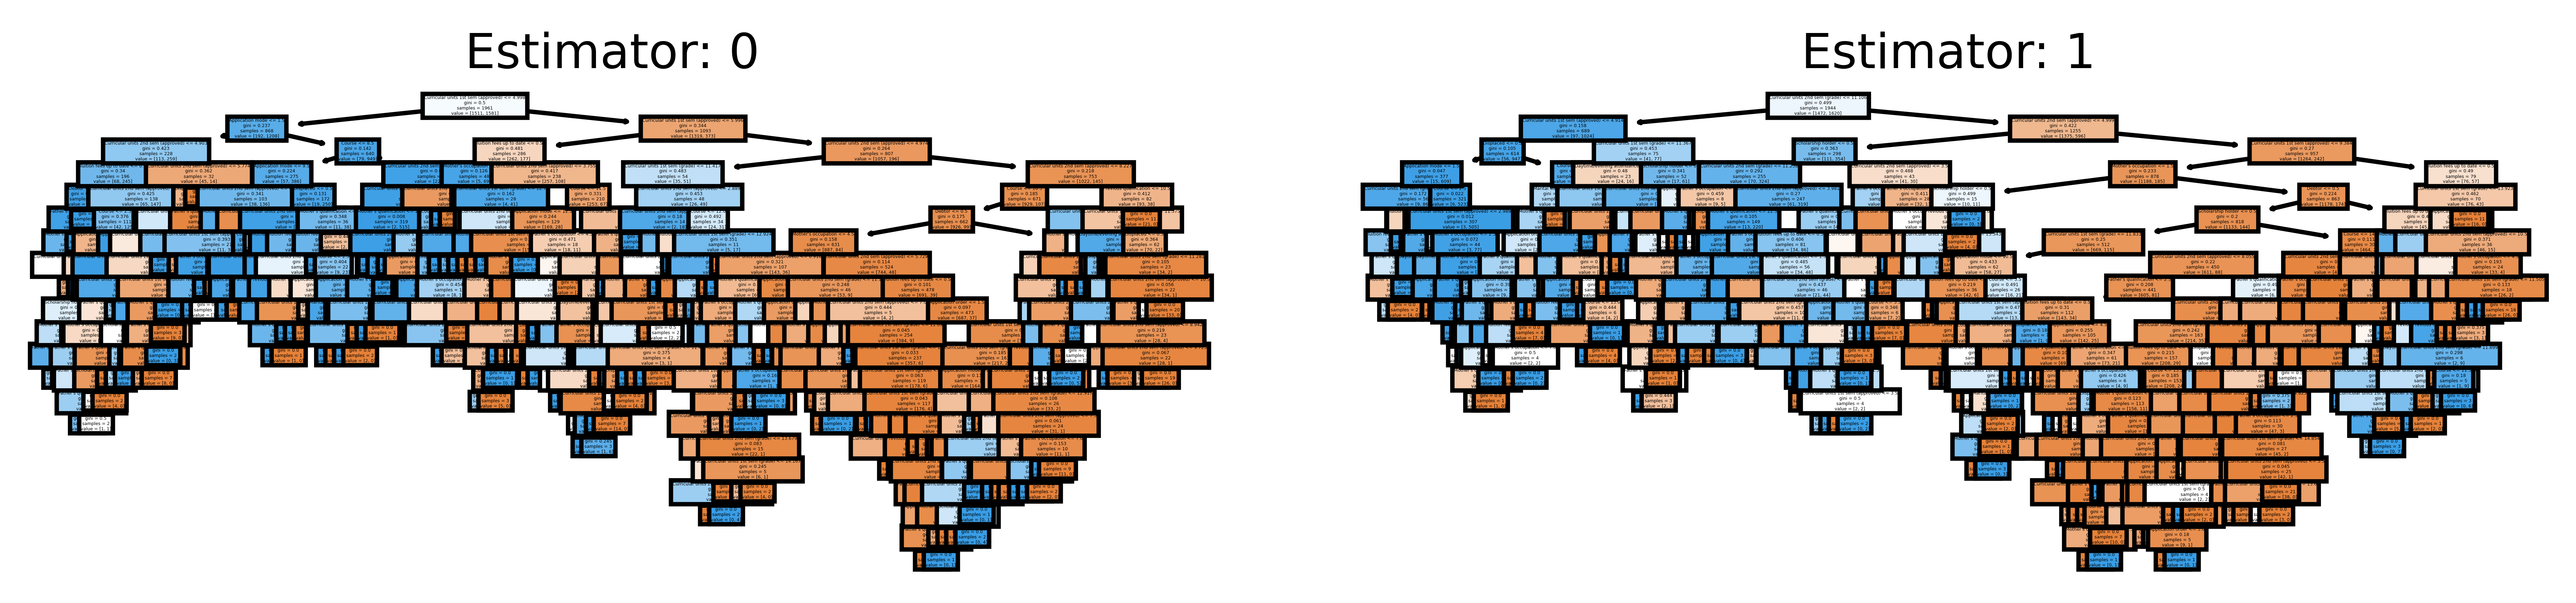

In [108]:
fn=X_train.columns
fig, axes = plt.subplots(nrows = 1,ncols = 2,figsize = (10,2), dpi=900)
for index in range(0, 2):
    tree.plot_tree(model_clf.estimators_[index],
                   feature_names = fn, 
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_2trees.png')